In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader import data  as pdr

SyntaxError: invalid syntax (3177556258.py, line 4)

In [2]:
ark_holdings = pd.read_csv('ARK_INNOVATION_ETF_ARKK_HOLDINGS.csv')
ark_holdings.tail()

,date,fund,company,ticker,cusip,shares,market value ($),weight (%)
32,05/14/2025,ARKK,PACIFIC BIOSCIENCES OF CALIF,PACB,69404D108,"23,244,736","$26,731,446.40",0.45%
33,05/14/2025,ARKK,CERUS CORP,CERS,157085101,"11,307,350","$14,812,628.50",0.25%
34,05/14/2025,ARKK,GOLDMAN FS TRSY OBLIG INST 468,NaN,X9USDGSFT,"13,532,208","$13,532,207.94",0.23%
35,05/14/2025,ARKK,SOFI TECHNOLOGIES INC,SOFI,83406F102,"112,976","$1,614,427.04",0.03%
36,Investors should carefully consider the invest...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
start, end = "2015-01-01", "2024-12-31"
df_arkk = yf.download("ARKK", start=start, end=end)

YF.download() has changed argument auto_adjust default to True
[*********************100%***********************]  1 of 1 completed


In [4]:
print(df_arkk.head())

Price           Close       High        Low       Open Volume
Ticker           ARKK       ARKK       ARKK       ARKK   ARKK
Date                                                         
2015-01-02  18.202000  18.951016  18.012489  18.951016   5600
2015-01-05  17.763420  18.382487  17.735445  18.382487   3200
2015-01-06  17.696642  17.859079  17.471035  17.859079   3300
2015-01-07  17.777859  17.895174  17.732736  17.895174   3900
2015-01-08  18.174925  18.174925  17.994440  17.994440    700


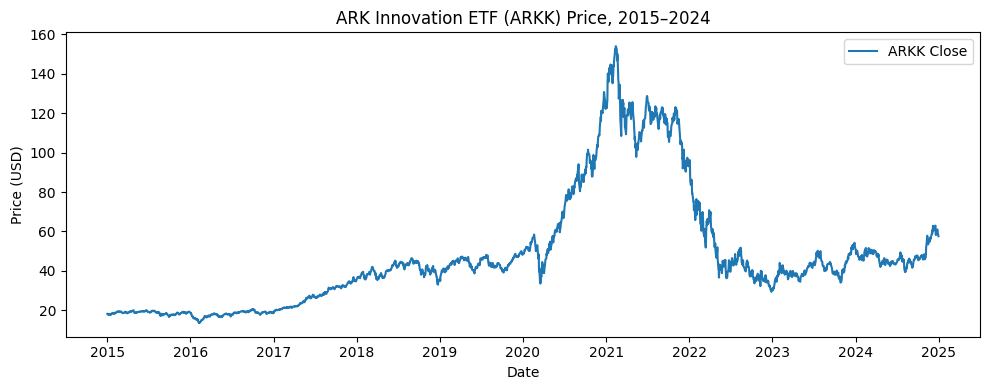

In [5]:
plt.figure(figsize=(10,4))
plt.plot(df_arkk.index, df_arkk["Close"], label="ARKK Close")
plt.title("ARK Innovation ETF (ARKK) Price, 2015–2024")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()



MultiIndex([( 'Close', 'ARKK'),
            (  'High', 'ARKK'),
            (   'Low', 'ARKK'),
            (  'Open', 'ARKK'),
            ('Volume', 'ARKK')],
           names=['Price', 'Ticker'])


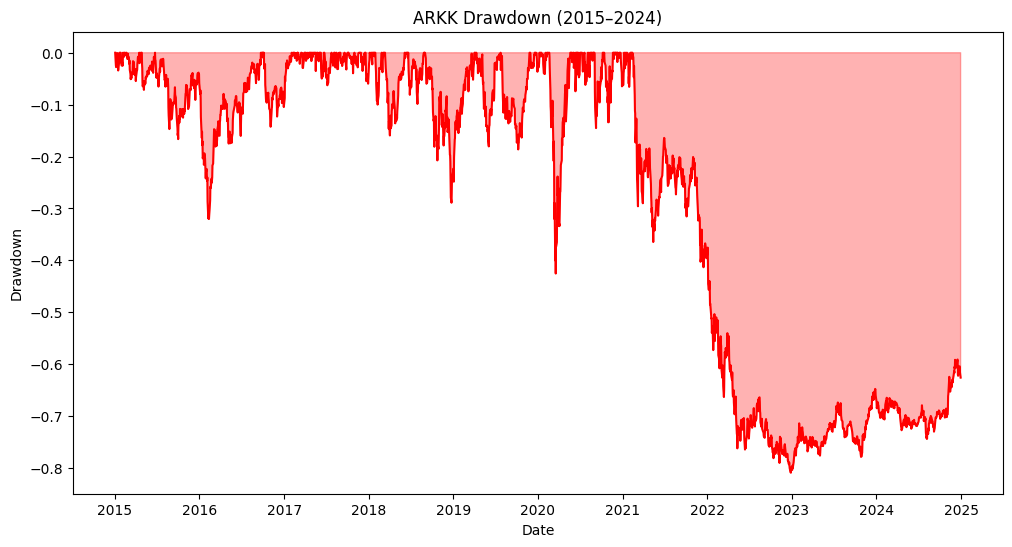

        Date Drawdown
0 2022-12-28  -80.91%
1 2022-12-27  -80.82%
2 2023-01-03  -80.39%
3 2022-12-23  -80.06%
4 2023-01-05  -80.03%


In [6]:
# 1) If you’ve ever downloaded multiple tickers at once, check your columns:
print(df_arkk.columns)

# 2) Pull out the ARKK Close price as a Series:
close = df_arkk['Close']
if isinstance(close, pd.DataFrame):
    # if it’s a one-column DataFrame, squeeze it
    close = close.squeeze()
close.name = 'Close'

# 3) Build a new df with just that Series (or overwrite your df_arkk)
df = close.to_frame()

# 4) Compute rolling max and drawdown
df['RollingMax'] = df['Close'].cummax()
df['Drawdown']  = df['Close'] / df['RollingMax'] - 1

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Drawdown'], color='red')
plt.fill_between(df.index, df['Drawdown'], 0,
                 where=df['Drawdown']<0, color='red', alpha=0.3)
plt.title('ARKK Drawdown (2015–2024)')
plt.ylabel('Drawdown')
plt.xlabel('Date')
plt.show()

# 6) Five worst troughs
worst5 = df['Drawdown'].nsmallest(5).reset_index()
worst5.columns = ['Date','Drawdown']
worst5['Drawdown'] = worst5['Drawdown'].map(lambda x: f"{x:.2%}")
print(worst5)


In [7]:
tickers = ['SPY', 'GD=F', 'HYG', 'GOLD', 'EURUSD=X', 'JPY=X']

start_date = '2014-10-31'
end_date = '2025-05-16'

dfs_full = {}

for ticker in tickers: 
    prices = yf.Ticker(ticker).history(start=start_date, end=end_date, auto_adjust=True)['Close']
    rets = prices.pct_change()
    dfs_full[ticker] = pd.DataFrame(index = rets.index, data ={'Return': rets}).dropna()


tsy_series = pdr.FredReader('DGS10', start = start_date, end = end_date).read()/100
D, C = 8,80
delta_y = tsy_series.diff()
tsy_price_ret = -D * delta_y + 0.5 * C * delta_y ** 2
tsy_carry_ret = tsy_series/252
tsy_ret = (tsy_carry_ret + tsy_price_ret).dropna()

dfs_full['TSY']=pd.DataFrame(index = tsy_series.index, data ={'Return':  tsy_ret['DGS10']})

for ticker in dfs_full:
    dfs_full[ticker].index = dfs_full[ticker].index.tz_localize(None)

 

AttributeError: module 'pandas_datareader' has no attribute 'FredReader'